In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



In [2]:
df=pd.read_csv(r'/Users/andresfiguerola/Downloads/data.csv')

/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Column legend (source https://osf.io/pyb8s/wiki/home/)

(columns marked N/A are more complicated to explain than useful)

id Unique subject ID

date Date at start of experiment

time Time at start of experiment

gender gender

age age

natlangs List of subject's native languages

primelangs List of subject's primary language now

dyslexia Did subject report difficulty with reading?

psychiatric Did subject report any psychiatric disorders

education highest level of education

tests N/A

Eng_start age at start of English learning

Eng_country_yrs number of years living in English-speaking country

house_Eng subject lives with any native English speakers?

dictionary subject reported using a dictionary to complete experiment

already_participated Subject reported prior participation in experiment

countries countries lived in

currcountry country currently lived in

US_region regions of USA lived in

UK_region regions of UK lived in

Can_region regions of Canada lived in

Ebonics speaker of Ebonics?

Ir_region county of Ireland lived in

UK_constituency constituency of UK lived in

nat_Eng native speaker of English

prime_Eng primary language is English

speaker_cat N/A

type N/A

lived_Eng_per Percentage of years speaking English that lived in English-speaking country.

Eng_little values are monoeng (native speaker of English only), bileng (native speaker of English + at least one other lang), lot (immersion learner), little (non-immersion learner).

correct percentage of critical items correct

elogit elogit of correct

natcon N/A

primeeng N/A

edtype N/A

In [3]:
df.columns


Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'dyslexia', 'psychiatric',
       ...
       'q34_6', 'q34_8', 'q35_1', 'q35_2', 'q35_4', 'q35_5', 'q35_7', 'q35_8',
       'correct', 'elogit'],
      dtype='object', length=128)

# Age vs gender statistics

How many People participated twice in the study

In [4]:
df.already_participated.sum()

0

Frequency of listed genders

In [5]:
df.gender.value_counts()


female    356724
male      306073
other       6701
Name: gender, dtype: int64

Data of individuals which reported a psichiatric condition

In [6]:
df_psych=df[df.psychiatric==1]

Frequency of listed genders for individuals with psychiatric disorders

In [7]:
df_psych.gender.value_counts()

male      10117
female     9975
other       483
Name: gender, dtype: int64

In [8]:
df_smpl=df.sample(n=5000)


Histogram of gender distribution of the sample

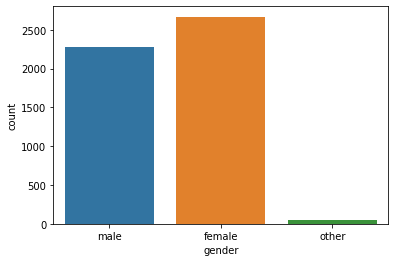

In [9]:
sns.countplot(df_smpl.gender);

Categorical plot of gender, age and psychiatric disorder prescence

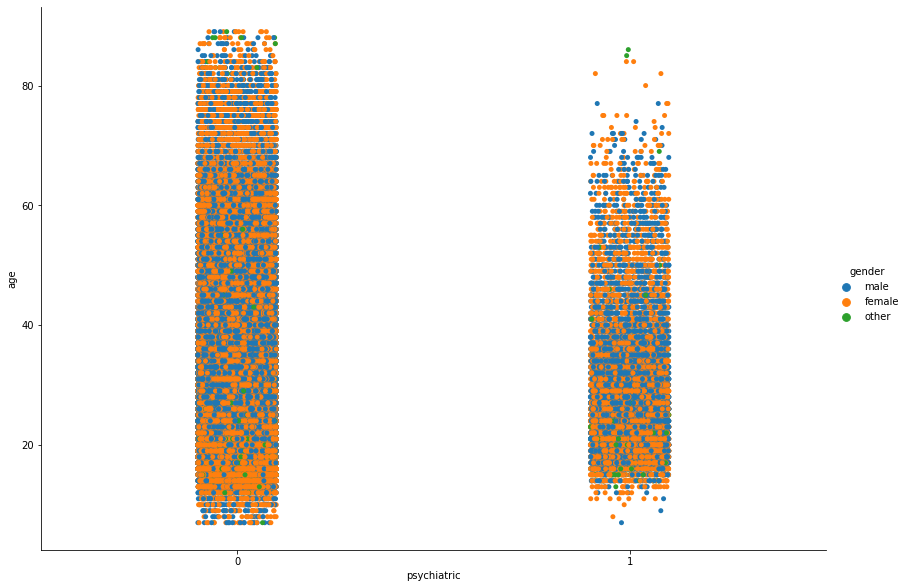

In [10]:
sns.catplot(x="psychiatric", y="age",hue="gender", data=df,height=8.27, aspect=11.7/8.27);

# Analyzing Age vs Correct percentage of answers

Age vs Correct percentage of answers correlation plot.

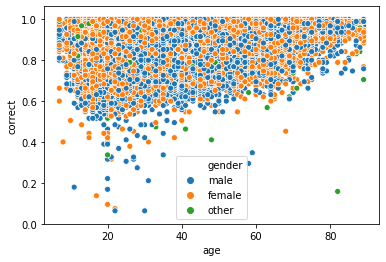

In [11]:
 ax = sns.scatterplot(x="age", y="correct", hue='gender', data=df)

We take a new sample of 5000 individuals to analyze the distributions

In [12]:
df_smpl=df.sample(n=5000)
X=df_smpl.age.to_numpy()
X=X.reshape(-1,1)
y=df_smpl.correct.to_numpy()
y=y.reshape(-1,1)

Perform Linear regression on  the sample about age vs correctness.

In [13]:
reg = LinearRegression().fit(X, y)


In [14]:
reg.score(X, y)

0.010455325823843453

As expected from the categorical plot the score (square of residual sums) is rather low.

In [15]:
print(reg.coef_)
print(reg.intercept_)

[[0.00055466]]
[0.92114053]


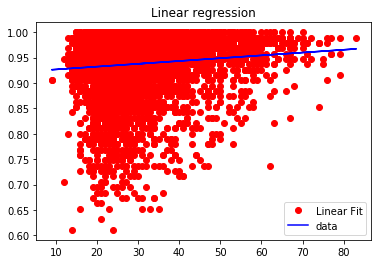

In [16]:
figlin = plt.figure()
plt.plot(X, y, 'r.', markersize=12)

plt.plot(X, reg.predict(X), 'b-')
# plt.gca().add_collection(lc)
plt.legend(('Linear Fit', 'data'), loc='lower right')
plt.title('Linear regression')
plt.show()
figlin.savefig('plotlinear.png')

Older people have a very slight improvement in average in the test score. This could however be influeced by the high frequency count on mid 20's to 30's of the sample.

Distribution of ages in the sample (histogram)

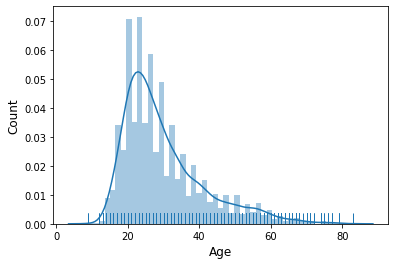

In [17]:
Age_dist_smpl= plt.figure()
sns.distplot(X, kde=True, rug=True);
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
Age_dist_smpl.savefig('Age_distribution_smpl')

# Analyze individuals with psychiatyric =1

Number of individuals who reported a psychiatric disorder

In [18]:
len(df[df.psychiatric==0])

648923

Number of individuals who did not report a psychiatric disorder

In [19]:
df.psychiatric[df.psychiatric==1].sum()

20575

Categorical Plot of age, gender and native speaker index of individuals with a psychiatric condition. 
nat_Eng=0 (Non Native English speaker), nat_Eng=1 (Native English speaker) 

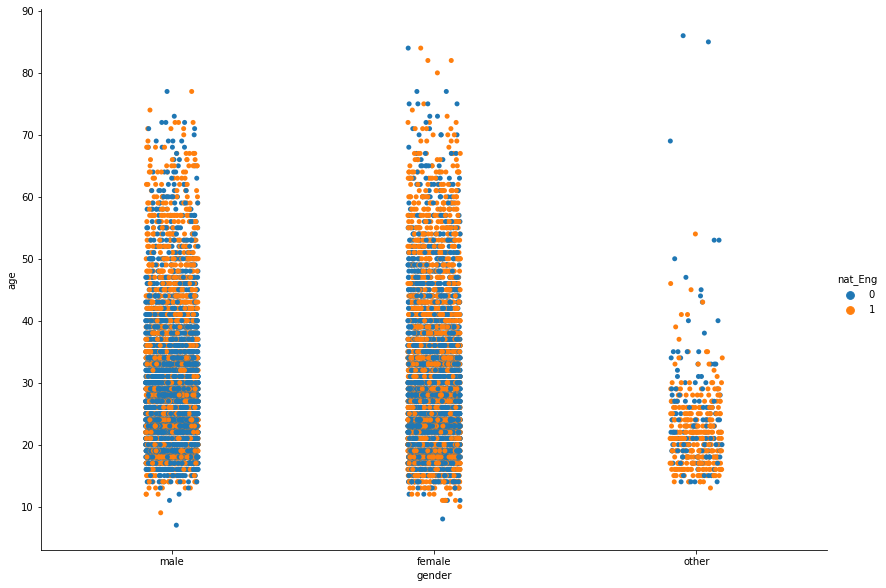

In [20]:
sns.catplot(x="gender", y="age",hue="nat_Eng", data=df_psych,height=8.27, aspect=11.7/8.27);

# Distribution plot of age a psychiatric condition correlation.

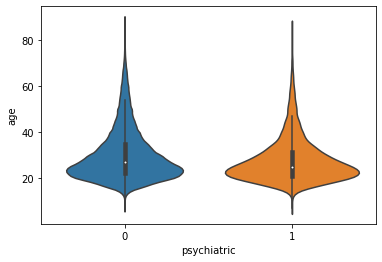

In [21]:
sns.violinplot(x="psychiatric", y="age", data=df)

The distribution looks similar

# Education  column Cleaning 

In [22]:


ed_list=['Graduate Degree','Undergraduate Degree (3-5 years higher ed)','Some Undergrad (higher ed)','High School Degree (12-13 years)',
 'Some Graduate School',"Didn't Finish High School (less than 13 years ed)", "Haven't Finished High School (less than 13 years ed)"]
df_ed=df[df.education.isin(ed_list)]

df_ed.loc[df_ed['education']=='Some Undergrad (higher ed)','education' ] = 'High School Degree (12-13 years)'
df_ed.loc[df_ed['education']=="Haven't Finished High School (less than 13 years ed)",'education'] = "Didn't Finish High School (less than 13 years ed)"
df_ed.loc[df_ed['education']=='Some Graduate School','education'] = 'Undergraduate Degree (3-5 years higher ed)'
df_ed.loc[df_ed['education']=='Undergraduate Degree (3-5 years higher ed)','education'] = 'Undergraduate Degree'
df_ed.loc[df_ed['education']=="Didn't Finish High School (less than 13 years ed)",'education'] = "Didn't Finish High School"
df_ed.loc[df_ed['education']=='High School Degree (12-13 years)','education' ] = 'High School Degree'
print(df_ed.education.unique())


/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['Graduate Degree' 'Undergraduate Degree' 'High School Degree'
 "Didn't Finish High School"]


The columns that start with q correspond to question numbers

In [23]:
questions_filter = [col for col in df if col.startswith('q')]
df_questions=df[questions_filter]

In [24]:
df_noQuestions=df.drop(df_questions.columns, axis=1)
df_noQuestions.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,NaN,HP,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,NaN,HP,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,NaN,NaN,1,1,native,Ebonics,NaN,monoeng,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,NaN,NaN,1,1,native,NaN,NaN,bileng,0.947368,2.800602


Gather data from participants in the US only

In [25]:
df_US=df_noQuestions[~df_noQuestions.US_region.isna()]
df_US=df_US[~df_US.US_region.isin(['none','nan'])]
df_US['education']=df_ed['education']
df_US.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,NaN,NaN,1,1,native,Ebonics,NaN,monoeng,0.905263,2.208853
5,6,6.0,2014-05-29,01:01:20,female,58,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.957895,3.012262
6,7,6.0,2014-05-29,01:01:20,female,58,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.989474,4.143135
7,8,7.0,2014-05-29,01:01:22,female,22,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.978947,3.621671
8,9,9.0,2014-05-29,01:02:09,male,53,Tagalog,English,0,0,...,NaN,NaN,0,0,native,NaN,1.0,NaN,0.947368,2.800602


# FIRST SUGGESTIVE PLOT. The threshold of correctness on individuals with psychiatric disorders appears higher that that of those without a disorder. This appears to be independent of the level of education and tears in English speaking country as we shall see in the next plot.

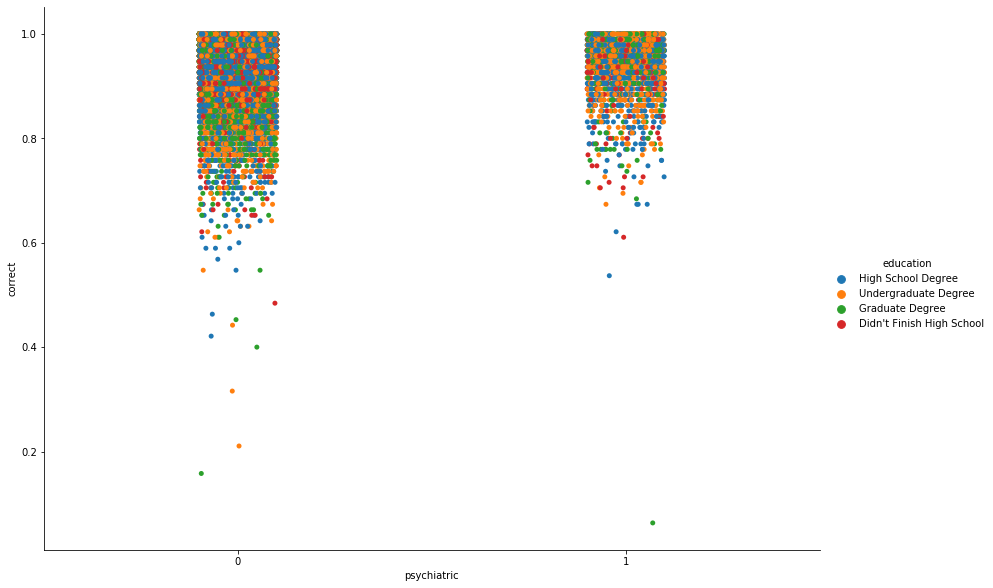

In [26]:
sns.catplot(x="psychiatric", y="correct",hue="education", data=df_US,height=8.27, aspect=11.7/8.27);

# SECOND SUGGESTIVE PLOT. The individuals with psychiatric disorders seem similarly distributed among the categories of education and years spent living in the US.

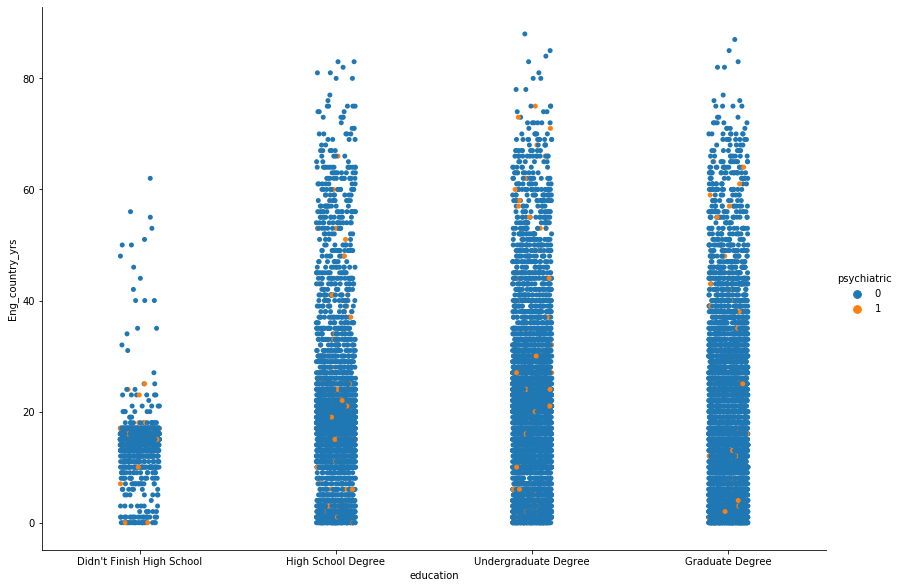

In [27]:
sns.catplot(x="education", y="Eng_country_yrs",hue="psychiatric", order=["Didn't Finish High School", "High School Degree"
                                                                        ,'Undergraduate Degree', "Graduate Degree"],data=df_US,height=8.27, aspect=11.7/8.27);

In [28]:
df_US.shape

(128336, 33)

# Countries of individuals with psychiatric disorders


We standarize some of the country names appearing

In [29]:
df_country=df.copy()
df_country.loc[df_country['currcountry']=='New Zealand, New Zealand']='New Zealand'
df_country.loc[df_country['currcountry']=='Korea-South, South Korea']='South Korea'
df_country.loc[df_country['currcountry']=='The Netherlands']='Netherlands'

List individuals which reported a psychiatric disorder

In [30]:
df_psy=df_country[df_country.psychiatric==1]

Top 20 current countries occurring by relative frequency

In [31]:
df_country.currcountry.value_counts(normalize=True)[0:20]


United States            0.227404
United Kingdom           0.106968
Canada                   0.061802
Finland                  0.060518
Turkey                   0.047208
Australia                0.043783
Germany                  0.043706
Netherlands              0.028363
Hungary                  0.027451
Sweden                   0.026833
Poland                   0.023809
Russia                   0.022215
Singapore                0.019748
Norway                   0.017319
New Zealand              0.016008
France                   0.015815
Spain                    0.014345
Italy                    0.012752
Belgium                  0.012665
Ireland (Republic of)    0.010958
Name: currcountry, dtype: float64

Top 20 current countries occurring within people which reported having 
a psychiatric dissorder by relative frequency



In [32]:
df_psy.currcountry.value_counts(normalize=True)[0:20]

United States            0.211548
United Kingdom           0.145162
Turkey                   0.085262
Finland                  0.066438
Poland                   0.057527
Canada                   0.055945
Australia                0.031215
Germany                  0.028157
Sweden                   0.023148
Netherlands              0.022041
Norway                   0.018297
Taiwan                   0.014975
Hungary                  0.014500
Belgium                  0.014448
Russia                   0.012813
France                   0.012549
New Zealand              0.011969
Ireland (Republic of)    0.011495
Spain                    0.010229
Singapore                0.009966
Name: currcountry, dtype: float64

Italy is not in the top 20 of psych but it is on the top 20 countries for general individuals
Taiwan is in the top 20 psych but is is not in the top 20 countries for general individuals

List of non unique current countries listed

In [60]:
countries=list(df_country['currcountry'].unique())


#find number of pairs or tuples of countries when more than one was listed

commas=0

for i in range(len(countries)):
    c=str(countries[i])
    l=re.findall('.+[,] .+',c)
    if len(l)>0:
        commas+=1
       
print(commas)

323


# Models on Psychiatyric prediction (world wide)


In [34]:
questions_filter.append('psychiatric')

In [35]:


df_questions=df[questions_filter]


In [36]:
print('Nan rows in psychiatric column:'+ str(df_questions.psychiatric.isna().sum()))
len(df_questions.columns)

Nan rows in psychiatric column:0


96

In [37]:
print('Number of individuals which reported a psychiatric disorder:'+ str(df_questions.psychiatric.sum()))


Number of individuals which reported a psychiatric disorder:20575


Remove duplicate tests that might corrupt the psychiatric model

In [38]:
questions_filter.pop()
df_q=df_questions.drop_duplicates(subset=questions_filter,keep=False)
print(df_q.shape)


(329360, 96)


Shuffle data and separate Quiz results from psychiatric report column

In [39]:
df_q=df_q.sample(frac=1)
df_p=df_q.psychiatric
df_q=df_q.drop('psychiatric',axis=1)

df_p=df_p.astype('int')


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_q, df_p, test_size=0.2, random_state=42)

In [41]:
print('Shape of test data: ' +str(X_test.shape))
print('Number of individuals in the test set which reported a psychiatric condition: '+str(y_test.sum()))

Shape of test data: (65872, 95)
Number of individuals in the test set which reported a psychiatric condition: 2815


In [42]:
print('Shape of Training data: ' +str(X_train.shape))
print('Number of individuals in the Training set which reported a psychiatric condition: '+str(y_train.sum()))

Shape of Training data: (263488, 95)
Number of individuals in the Training set which reported a psychiatric condition: 11243


/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for Logistic Regression:
[[63051     6]
 [ 2814     1]]
Logistic Regression Number of mislabeled points out of a total 65872 points  : 2820
Accuracy of Logistic Regression : 0.957190
auc score of Logistic Regression : 0.673858


Confusion Matrix for Naive Bayes:
[[53348  9709]
 [ 1905   910]]
Naive Bayes Number of mislabeled points out of a total 65872 points  : 11614
Accuracy of Naive Bayes : 0.823688
auc score of Naive Bayes : 0.630566




/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Random Forest:
[[63024    33]
 [ 2812     3]]
Random Forest Number of mislabeled points out of a total 65872 points  : 2845
Accuracy of Random Forest : 0.956810
auc score of Random Forest : 0.568856




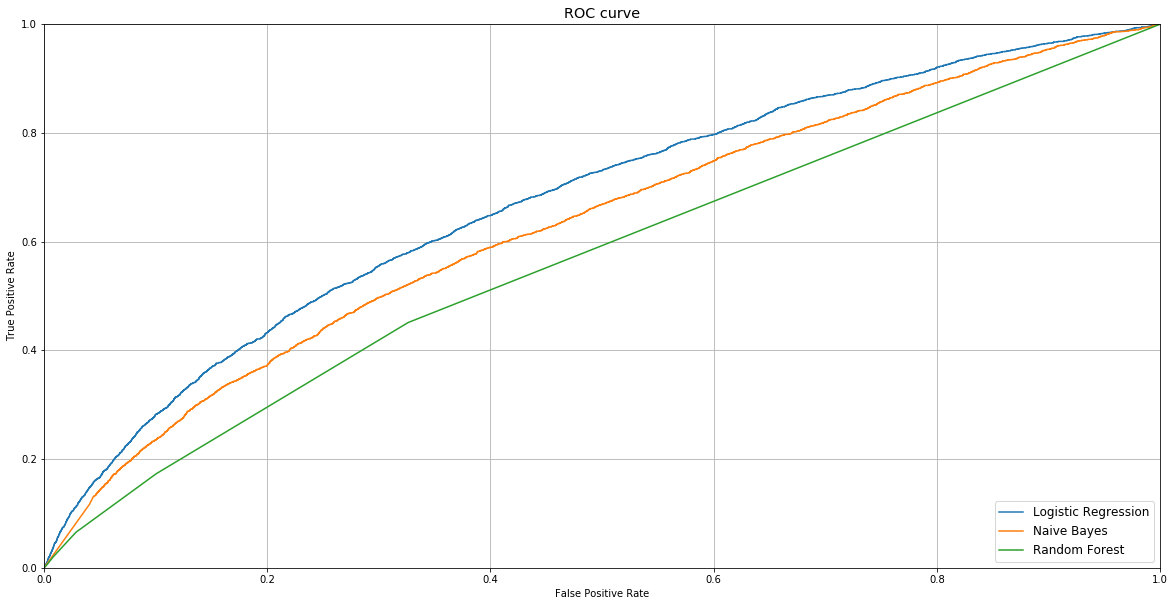

In [43]:
def Build_Model_and_ROC(model,name,  X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_predictions_probability=model.predict_proba(X_test)[:,1]
    
    #Get the confusion matrix of the classifier
    confusion=metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    print('Confusion Matrix for '+ name +':')
    print(confusion)
   
    #ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predictions_probability)

    #Plotting ROC curve
  
    plt.plot(fpr, tpr, label=name)
    

    print(name+" Number of mislabeled points out of a total %d points  : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
    print( 'Accuracy of '+ name+ ' : %f'%(metrics.accuracy_score(y_test, y_pred)))
    print('auc score of '+ name+ ' : %f'%( metrics.roc_auc_score(y_test, test_predictions_probability)))
    print('\n')
  
   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(loc=4) 

models={ 'Logistic Regression': LogisticRegression(), 'Naive Bayes': GaussianNB(),
        'Random Forest':RandomForestClassifier()}

plt.figure(figsize=(20,10))

for name, model in models.items():
    Build_Model_and_ROC( model, name,  X_train, X_test, y_train, y_test)    


I tried also XGBoostClassifier and  Bagging Classifier, but the performance was worse that this three models, it would mark almost everything as 0 (no Psychiatric disorder). 

#  Analysis and prediction regarding the Ebonics column.

# Principal Component Analysis on questions dataset whose Ebonics column is not null


In [44]:
questions_filter = [col for col in df if col.startswith('q')]
questions_filter.append('Ebonics')
df_questions=df[questions_filter]

df_questions=df_questions[df_questions.Ebonics.notnull()]
len(df_questions.columns)
questions_filter.pop()
df_questions=df_questions.drop('Ebonics',axis=1)
df_questions.shape

(169115, 95)

Perform PCA on questions data

In [45]:
X_train=df_questions
pca2=PCA(n_components=2)

X2D=pca2.fit_transform(X_train)


Coordinate generator for Plotting

In [46]:
def coords(data):
    x=np.zeros(len(data))
    y=np.zeros(len(data))
    for i in range(len(data)):
        x[i]=data[i][0]
        y[i]=data[i][1]
        
    return x,y

x,y=coords(X2D)


[]

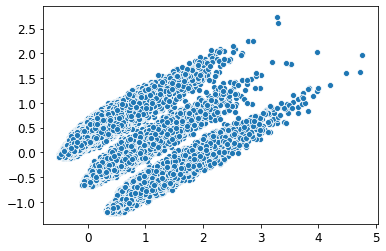

In [47]:
datf = pd.DataFrame(X2D, columns=["x", "y"])

sns.scatterplot(x, y).plot()

 The quiz had in total sections, the first one consisted on describing the situation corrsponding in an image, the second was to fill in the correct word(s) in a sentence, and the third was to identify grammatically correct sentences from a list. My Hypothesis is that these 3 clusters correspond exactly to people which did incrementally beter on each section of the quiz.

Principal Component analysis on the full questions dataset shows uniform sparsity accross the components.

# Models on Ebonics speaking prediction

Removing rows on which the 'Ebonics' column is null

In [48]:
questions_filter.append('Ebonics')
df_questions=df[questions_filter]

df_questions=df_questions[df_questions.Ebonics.notnull()]
len(df_questions.columns)

96

Shape of non null Ebonics data.

In [49]:
df_questions.head()
df_questions.shape

(169115, 96)

Cleaning Ebonics column

In [50]:
df_questions['Ebonics'].unique()

array(['0', '1', 'Array', 0.0, 1.0], dtype=object)

In [51]:
df_questions.loc[df_questions['Ebonics']=='Array','Ebonics']=0
df_questions.loc[df_questions['Ebonics']=='1', 'Ebonics']=1
df_questions.loc[df_questions['Ebonics']=='0', 'Ebonics']=0
df_questions=df_questions[df_questions['Ebonics'].notnull()]

In [52]:
questions_filter.pop()

'Ebonics'

Remove duplicate tests that might corrupt the model

In [53]:

df_q=df_questions.drop_duplicates(subset=questions_filter,keep=False)
print(df_q.shape)
df_q.head()

(62124, 96)


,q1,q2,q3,q5,q6,q7,q9_1,q9_4,q10_2,q10_4,...,q34_4,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,Ebonics
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
5,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
8,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
33,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


How many individuals reported to speak 'Ebonics' 

In [54]:
df_q.Ebonics.sum()

2800.0

In [55]:
df_q=df_q.sample(frac=1)
df_e=df_q.Ebonics
df_q=df_q.drop('Ebonics',axis=1)

df_e=df_e.astype('int')


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_q, df_e, test_size=0.2, random_state=1)

In [57]:
print('Shape of test data: ' +str(X_test.shape))
print('Number of individuals in the test set which reported to speak Ebonics: '+str(y_test.sum()))

Shape of test data: (12425, 95)
Number of individuals in the test set which reported to speak Ebonics: 591


In [58]:
print('Shape of Training data: ' +str(X_train.shape))
print('Number of individuals in the training set which reported to speak Ebonics: '+str(y_train.sum()))

Shape of Training data: (49699, 95)
Number of individuals in the training set which reported to speak Ebonics: 2209


/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for Logistic Regression:
[[11824    10]
 [  581    10]]
Logistic Regression Number of mislabeled points out of a total 12425 points  : 591
Accuracy of Logistic Regression : 0.952435
auc score of Logistic Regression : 0.638821


Confusion Matrix for Naive Bayes:
[[10369  1465]
 [  451   140]]
Naive Bayes Number of mislabeled points out of a total 12425 points  : 1916
Accuracy of Naive Bayes : 0.845795
auc score of Naive Bayes : 0.608251




/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Random Forest:
[[11808    26]
 [  582     9]]
Random Forest Number of mislabeled points out of a total 12425 points  : 608
Accuracy of Random Forest : 0.951066
auc score of Random Forest : 0.570213




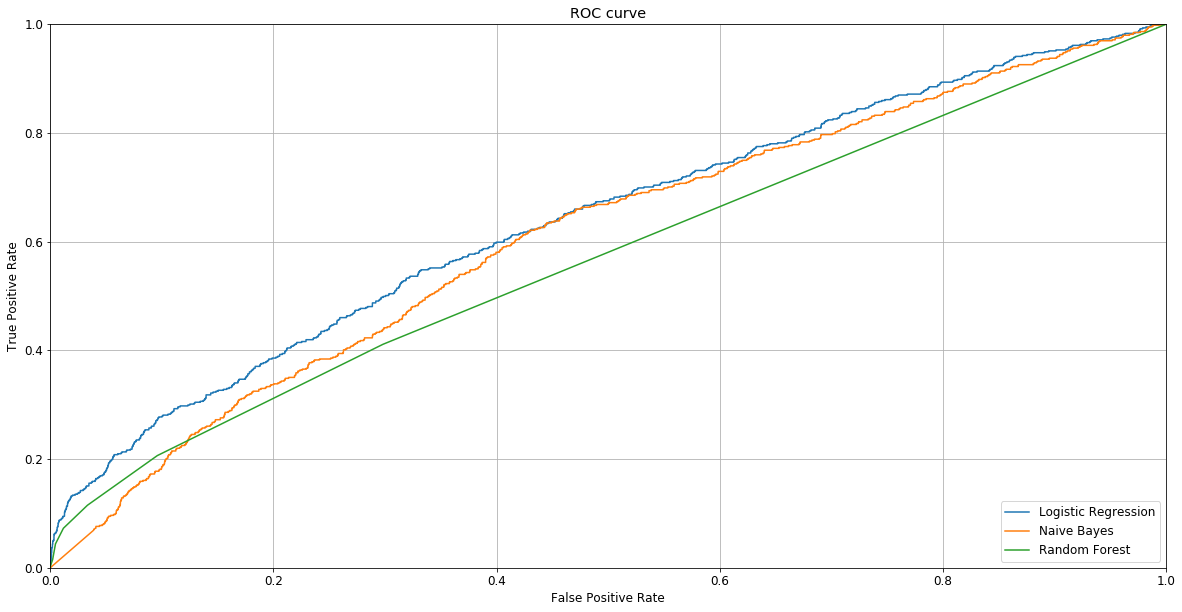

In [59]:
def Build_Model_and_ROC(model,name,  X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_predictions_probability=model.predict_proba(X_test)[:,1]
    
    #Get the confusion matrix of the classifier
    confusion=metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    print('Confusion Matrix for '+ name +':')
    print(confusion)
   
    #ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predictions_probability)

    #Plotting ROC curve
  
    plt.plot(fpr, tpr, label=name)
    

    print(name+" Number of mislabeled points out of a total %d points  : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
    print( 'Accuracy of '+ name+ ' : %f'%(metrics.accuracy_score(y_test, y_pred)))
    print('auc score of '+ name+ ' : %f'%( metrics.roc_auc_score(y_test, test_predictions_probability)))
    print('\n')
  
   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(loc=4) 

models={ 'Logistic Regression': LogisticRegression(), 'Naive Bayes': GaussianNB(),
        'Random Forest':RandomForestClassifier()}
#, 'Decision Tree Bagging' : BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100 ,
 #                        bootstrap=True, n_jobs=-1,oob_score=True)} 
plt.figure(figsize=(20,10))
for name, model in models.items():
    Build_Model_and_ROC( model, name,  X_train, X_test, y_train, y_test) 

I tried also XGBoostClassifier and  Bagging Classifier, but the performance was worse that this three models, it would mark almost everything as 0 (non Ebonics speaker). 